In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from collections import defaultdict
import nltk
from nltk.translate.bleu_score import sentence_bleu


In [5]:
# Example:
original_stories = ["""In a quiet village nestled in a valley, there lived a young girl named Luna. Luna was named after the moon because she was born on a clear, starry night when the moon was at its brightest. She had always felt a special connection to the night sky. One night, as Luna gazed out her window at the glowing moon, she noticed a soft, shimmering light descending from the night sky. It looked like a tiny shooting star, but it was actually a moonbeam, and it landed right in her garden. Curious and excited, Luna ventured into her garden and discovered a radiant, sparkling crystal at the spot where the moonbeam had landed. She picked it up, and it filled her heart with a warm, comforting glow. The crystal was more than just a beautiful gem; it had the power to bring light and happiness to those around her. Luna decided to share the moonbeam's gift with her village. She started by visiting her elderly neighbor, Mr. Jenkins, who lived alone and felt lonely in the dark. Luna gave him the crystal, and its soft, radiant light filled his home with warmth. He smiled, feeling the loneliness melt away. Luna continued to share the crystal's light with others in the village. She brightened the nights of children who were scared of the dark, comforted those who felt sad, and inspired artists and dreamers with its gentle glow. The village began to glow with kindness and happiness, and Luna's moonbeam gift was a beacon of hope for all. The villagers called her "Luna, the Light bearer. “Luna knew that the moonbeam's gift was meant to be shared, and it had brought not only light but also love to the hearts of everyone in the village."""]
t5_summaries = ["""Luna, born on a clear night, had a special connection to the night sky. One night, she found a moonbeam in her garden, which she discovered was a radiant crystal. Luna shared the crystal with her village, including her elderly neighbor, Mr. Jenkins, who felt lonely in the dark. The crystal's light filled his home, comforted others, and inspired artists and dreamers. The village began to glow with kindness and happiness, and Luna was called "Luna, the Light bearer." Her moonbeam gift brought light and love to the hearts of everyone in the village"""]

In [6]:
def calculate_bleu(reference, hypothesis):
    return sentence_bleu([reference], hypothesis, weights=(0.25, 0.25, 0.25, 0.25))

bleu_scores = [calculate_bleu(orig, summ) for orig, summ in zip(original_stories, t5_summaries)]


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit_transform(original_stories + t5_summaries)
vectors = vectorizer.toarray()

semantic_scores = []
for i in range(len(original_stories)):
    score = 1 - cosine(vectors[i], vectors[len(original_stories) + i])
    semantic_scores.append(score)


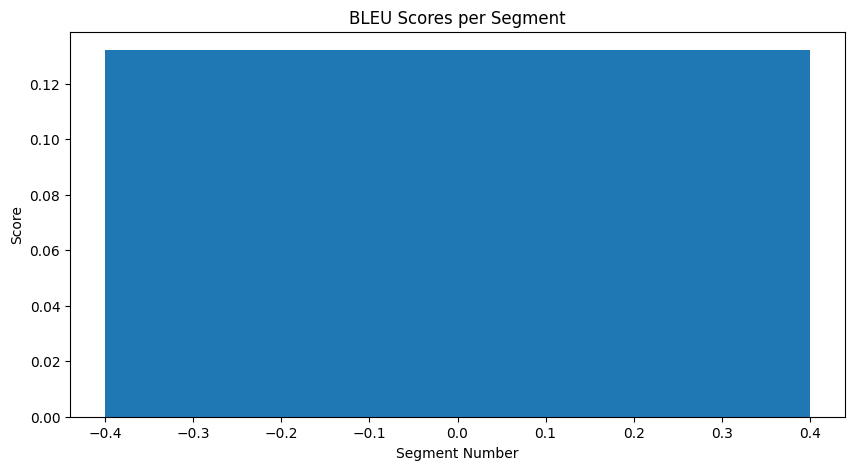

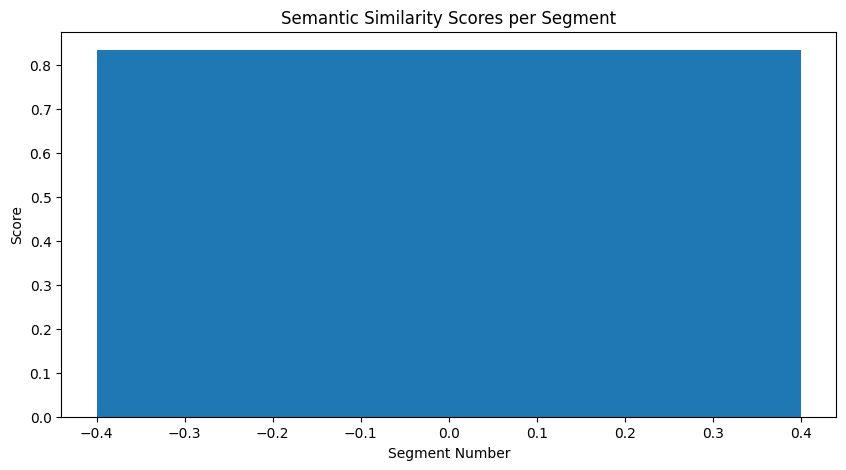

In [8]:
def plot_scores(scores, title):
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(scores)), scores)
    plt.xlabel('Segment Number')
    plt.ylabel('Score')
    plt.title(title)
    plt.show()

plot_scores(bleu_scores, 'BLEU Scores per Segment')
plot_scores(semantic_scores, 'Semantic Similarity Scores per Segment')


Average BLEU score: 0.13
Average Semantic Similarity score: 0.83


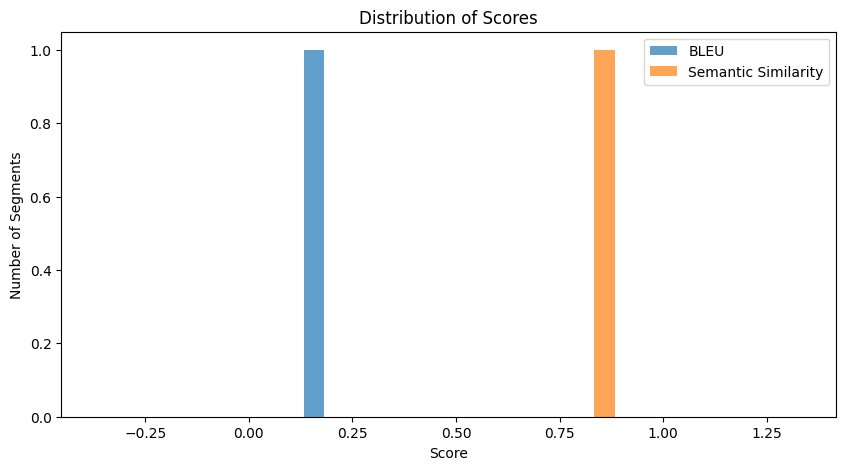

In [9]:
print(f"Average BLEU score: {np.mean(bleu_scores):.2f}")
print(f"Average Semantic Similarity score: {np.mean(semantic_scores):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(bleu_scores, bins=20, alpha=0.7, label='BLEU')
plt.hist(semantic_scores, bins=20, alpha=0.7, label='Semantic Similarity')
plt.legend(loc='upper right')
plt.xlabel('Score')
plt.ylabel('Number of Segments')
plt.title('Distribution of Scores')
plt.show()


Average Human vs. T5 BLEU score: 0.58


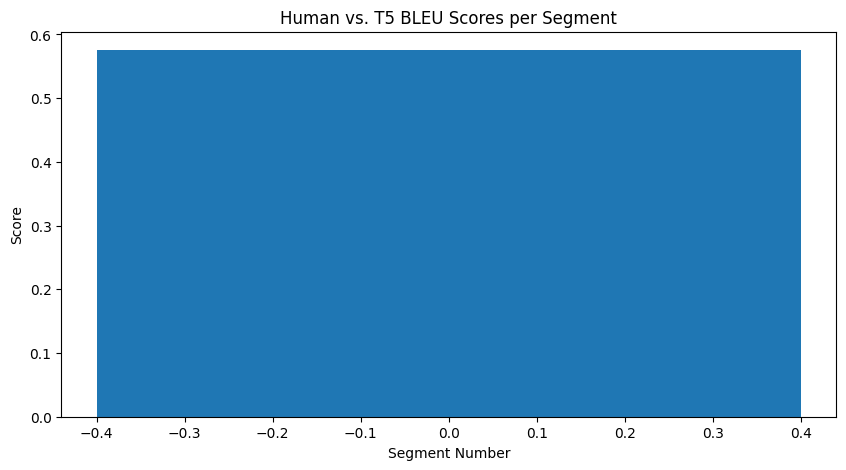

In [10]:
human_summaries = ["""a young girl in a small village, a young girl named Luna was named after the moon because she was born on a clear, starry night when the moon was at its brightest. She had always felt a special connection to the night sky. One night, Luna gazed out her window at the glowing moon, she noticed a radiant, radiant crystal at the spot where the moonbeam landed. She picked it up, and it filled her heart with a warm, comforting glow. Luna decided to share the crystal's light with her village."""]
human_bleu_scores = [calculate_bleu(human, t5) for human, t5 in zip(human_summaries, t5_summaries)]

print(f"Average Human vs. T5 BLEU score: {np.mean(human_bleu_scores):.2f}")
plot_scores(human_bleu_scores, 'Human vs. T5 BLEU Scores per Segment')
